# Chapter 4 - Clustering Models
## Segment 2 - Hierarchial methods


#### Background 
    unsupervised learning 
    group by distance with neighboring data points and group data that are most similar to a group
    Parameters
        1. distance
            Euclidean, Manhattan and cosine
        2. linkage 
            ward, complete and average 
        3. param mode selection: try every combination and use the model that gives the best accuracy 

#### Setting up for clustering analysis

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
import sklearn.metrics as sm

In [9]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [10]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')


In [11]:
pwd

'/Users/zhengyichen/Desktop/Ex_Files_Python_Data_Science_EssT_Pt2/Exercise Files/04_02_begin'

In [14]:
address = '/Users/zhengyichen/Desktop/Ex_Files_Python_Data_Science_EssT_Pt2/Exercise Files/Data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X = cars[['mpg', 'disp', 'hp', 'wt']].values
print(X.shape) #only with values, no header or col names

y = cars.iloc[:,9].values

(32, 4)


### Using scipy to generate dendrograms

In [17]:
#gen dendrogram 
Z = linkage(X, 'ward') #ward is a dist method name 
Z.shape

(31, 4)

##### linkage function def
A (n−1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster (n+1). A cluster with an index less than n corresponds to one of the n
 original observations. 
 
 The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

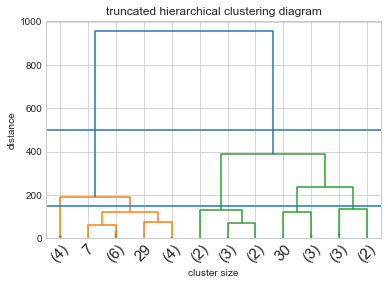

In [23]:
#dendrogram function used to plot a hierarchical clustering.
#last p: let the last level have p branches (end nodes)
dendrogram(Z, truncate_mode =  'lastp', p = 12, leaf_rotation=45, 
           leaf_font_size= 15, show_contracted=True)
plt.title("truncated hierarchical clustering diagram")
plt.xlabel("cluster size")
plt.ylabel("distance")

plt.axhline(y=500)
plt.axhline(y = 150)
plt.show()
#hierarchy 
#hierarchical 

## Generating hierarchical clusters

we want to use the features to predict classification of am, which has 2 possible values. 

We can use k=2 in the hierarchical classification

In [27]:
k = 2
#create the model obj
hClustering = AgglomerativeClustering( 
    n_clusters=k, affinity = 'euclidean', linkage = 'ward')
#fit the model with data
hClustering.fit(X)

#sklearn.metrics 
print(hClustering.labels_.shape)
print(hClustering.labels_)#since we let k = 2, each data either 1 or 0
scores = sm.accuracy_score(y, hClustering.labels_)
print(scores)


(32,)
[1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1]
0.78125


In [29]:
hClustering = AgglomerativeClustering( 
    n_clusters=k, affinity = 'euclidean', linkage = 'average')
hClustering.fit(X)
scores = sm.accuracy_score(y, hClustering.labels_)
print(scores)

0.78125


In [30]:
hClustering = AgglomerativeClustering( 
    n_clusters=k, affinity = 'manhattan', linkage = 'average')
hClustering.fit(X)
scores = sm.accuracy_score(y, hClustering.labels_)
print(scores)

0.71875


In [31]:
#using euclidean affinity looks good for the data set for both linkage
#use these parameters for later predictions